# Modelisations de la distribution des variables magnitudes (class)et profondeur (depth)

### Chargement des librairies necessaires

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
data = pd.read_csv('C:/Users/khali/Documents/TER-BNN/data/eq_data.csv')
print(data.shape)
data.head()

(247474, 10)


,year,month,date,hour,minute,seconds,lat,long,depth,class
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5


In [148]:
data.describe()

,year,month,date,hour,minute,seconds,lat,long,depth,class
count,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000,247474.000000
mean,2004.278546,6.365970,15.773956,11.547152,29.452480,29.545738,37.369375,140.592969,44.580025,3.076008
std,7.077706,3.299538,8.732712,6.882993,17.323443,17.328707,3.211989,3.603936,64.011168,0.538819
min,1990.000000,1.000000,1.000000,0.000000,0.000000,0.000000,21.864700,7.987000,0.000000,2.500000
25%,1999.000000,3.000000,8.000000,6.000000,14.000000,14.090000,35.060000,139.260000,14.000000,2.700000
50%,2005.000000,6.000000,16.000000,12.000000,29.000000,30.000000,37.189600,141.330000,30.000000,2.900000
75%,2011.000000,9.000000,23.000000,17.000000,44.000000,45.000000,39.370000,142.529300,47.400000,3.300000
max,2016.000000,12.000000,31.000000,23.000000,59.000000,59.099000,77.763000,163.656000,602.500000,9.000000


In [149]:
df_cla4 = data[data['class']> 4] # on recupère que les magnitudes >=4
df_cla4.describe()


,year,month,date,hour,minute,seconds,lat,long,depth,class
count,14510.00000,14510.000000,14510.000000,14510.000000,14510.000000,14510.000000,14510.000000,14510.000000,14510.000000,14510.000000
mean,2005.87071,5.968298,15.416954,11.474638,29.490972,29.446093,37.690771,141.516802,47.397760,4.552433
std,6.88444,3.280439,8.292059,6.859530,17.246256,17.321428,3.314929,3.581725,69.001775,0.499274
min,1990.00000,1.000000,1.000000,0.000000,0.000000,0.000000,23.864000,7.987000,0.000000,4.100000
25%,2000.00000,3.000000,9.000000,6.000000,15.000000,14.089250,35.972725,140.611075,17.200000,4.200000
50%,2009.00000,5.000000,15.000000,11.000000,29.000000,29.085000,37.534150,142.030850,31.100000,4.400000
75%,2011.00000,9.000000,22.000000,17.000000,44.000000,45.007000,39.640750,143.369900,49.500000,4.700000
max,2016.00000,12.000000,31.000000,23.000000,59.000000,59.099000,77.763000,151.339200,602.500000,9.000000


In [150]:
print(sum(df_cla4['class']>=4))
print("ratio donnée conservé :", (sum(df_cla5['class']>=5)/ data.shape[0])*100, "%") # On regarde la proportion de données conservées

14510
ratio donnée conservé : 0.9645457704647762 %


### Idée de la distribution de depth et de la distribution en intensité de class

C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

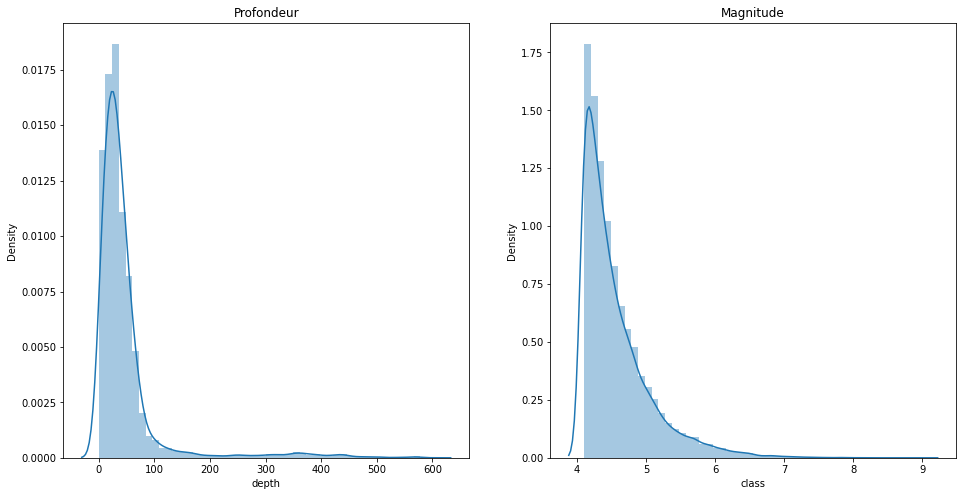

In [151]:
plt.figure(figsize = (16,8))
plt.subplot(121)
sns.distplot(df_cla4['depth'])
plt.title("Profondeur")
plt.subplot(122)
sns.distplot(df_cla4['class'])
plt.title("Magnitude")
plt.plot()

In [152]:
# librairie pour l'estimation des paramètres
import scipy
import scipy.stats

On va regarder parmi une liste de lois quelle loi s'y prête mieux à notre jeu de données.

Pour cela on va classer les lois en comparant les residus carré entre leurs distributions et la distribution de nos données.

In [153]:

dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma', 'invgauss',  'loggamma', 'alpha', 'chi', 'chi2']

#dist_names = ['t', 'invgamma', 'lognorm','alpha', 'invgauss','pareto','beta', 'loggamma']

sum_square_error = []
p_value=[]

for distribution in dist_names:
    y, x= np.histogram(df_cla4['depth'], bins=500, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
######## méthode fit
    dist = getattr(scipy.stats, distribution)
    parameters = dist.fit(df_cla4['depth'])
    
######## paramètres
    loc = parameters[-2]
    scale = parameters[-1]
    arg = parameters[:-2]
    
######## Calcul de Sum square error
    pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
    sse = np.sum( (y - pdf)**2 )
    sum_square_error.append(sse)
    
######## Calcul de p_value
    p= scipy.stats.kstest(df_cla4['depth'], distribution, parameters)[1]
    p_value.append(p)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['Résidus au carré'] = sum_square_error
results['p_value'] = p_value
results.sort_values(['Résidus au carré'], inplace=True, ascending=True)
###### rapport
print ('Classement des lois pour la variable depth:')
results



C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Classement des lois pour la variable depth:


,Distribution,Résidus au carré,p_value
6,invgamma,0.002317,8.515777e-35
5,lognorm,0.002466,3.369712e-55
4,t,0.002473,5.576721e-190
7,invgauss,0.002667,2.912791e-104
11,chi2,0.003110,1.515004e-112
1,beta,0.003490,8.102069e-212
10,chi,0.004111,0.000000e+00
0,norm,0.006695,0.000000e+00
8,loggamma,0.006803,0.000000e+00
2,gamma,0.011252,0.000000e+00


**Mieux, on va definir une fonction pour la suite qui nous renvoie directement la loi qui s'approche le mieux de la distribution de notre donnée ainsi que les estimations des paramètres associés**

In [154]:

def estim_best_loi(data, sse_thr = 0.01):
    # sse_thr = seuil d'acceptation du best
    sse = np.inf
          
    ### Histogramme des données
    y, x = np.histogram(data, bins=50, density=True)
    # Milieu de chaque classe
    x = (x + np.roll(x, -1))[:-1] / 2.0


    # Pour chaque distribution
    for name in dist_names:

        # Modéliser
        dist = getattr(scipy.stats, name)
        param = dist.fit(data)

        # Paramètres
        loc = param[-2]
        scale = param[-1]
        arg = param[:-2]

        # PDF
        pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
        # SSE
        model_sse = np.sum((y - pdf)**2)

        # Si le SSE est ddiminué, enregistrer la loi
        if model_sse < sse :
            best_pdf = pdf
            sse = model_sse
            best_loc = loc
            best_scale = scale
            best_arg = arg
            best_name = name

        # Si en dessous du seuil, quitter la boucle
        if model_sse < sse_thr :
            break
            
    ### Affichage de la meilleure loi avec paramètre associé
    
    plt.figure(figsize=(12,8))
    plt.plot(x, y, label="Données")
    plt.plot(x, best_pdf, label=best_name, linewidth=3)
    plt.title("{}".format(pd.DataFrame(data).columns))
    plt.legend(loc='upper right')
    plt.show()

    # Détails sur la loi sélectionnée
    print("Selected Model : ", best_name)
    print("Loc. param. : ", best_loc)
    print("Scale param. : ", best_scale)
    print("Other arguments : ", best_arg)
    print("SSE : ", sse)
    
    return [best_name, best_loc, best_scale, best_arg, sse]


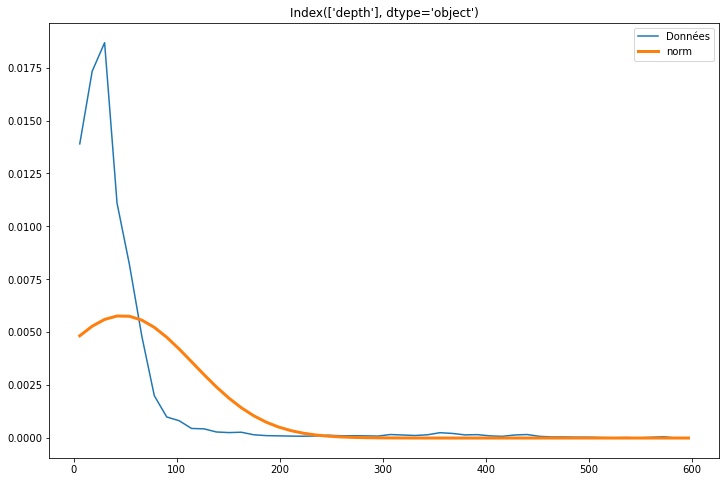

Selected Model :  norm
Loc. param. :  47.39776016540317
Scale param. :  68.99939762279902
Other arguments :  ()
SSE :  0.00049628430459111


['norm', 47.39776016540317, 68.99939762279902, (), 0.00049628430459111]

In [155]:
estim_best_loi(df_cla4.iloc[:, 8]) # pour la variable profondeur

Cette approximation avec la loi normale n'est pas satisfaisante et semble contradictoire avec le classement obtenu précedement. On durcit le critère de selection en reduisant le seuil du sse de 0.01 à 0.000005


C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


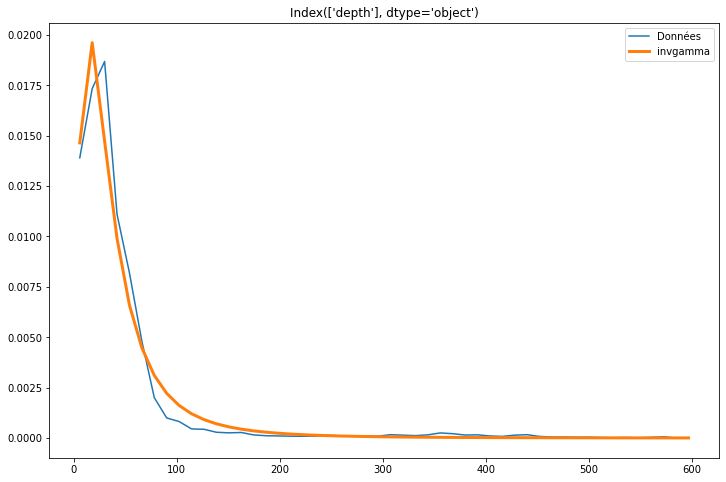

Selected Model :  invgamma
Loc. param. :  -13.627608350779372
Scale param. :  111.29837854399821
Other arguments :  (2.8904450379525963,)
SSE :  3.023512462549447e-05


In [156]:
params_depth = estim_best_loi(df_cla4.iloc[:, 8], 0.000005)

L'inverse de la loi gamma inverse semble mieux être adapter à la distribution en intensité de la variable depth. Les paramètres estimés associés à cette loi sont dans la liste params_depth.



C:\Users\khali\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


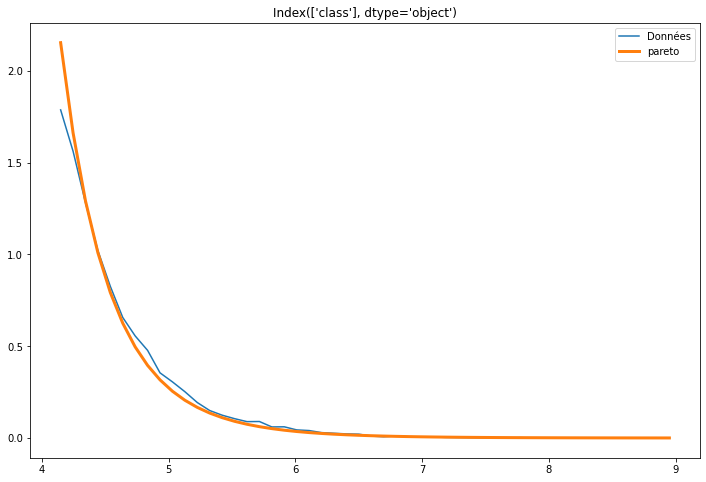

Selected Model :  pareto
Loc. param. :  0.003973512055980779
Scale param. :  4.0960264879192305
Other arguments :  (10.062113182724671,)
SSE :  0.1660317646972128


In [157]:
params_class =estim_best_loi(df_cla4['class']) # pour la variable magnitude

La loi de pareto remporte la course. Elle s'adapte bien à la distribution.

## Remarques

Ces 2 modélisations empiriques doivent être testés sur des données tests avant utilisation dans la suite de notre travail. Donc necessité de créer une base test. 

Ce qui serait interessant de faire maintenant est d'estimer des lois pour ces 2 variables en fonction des zones (3 ou 4 par exemple) et verifier la stabilité de ces lois 

# Modelisation de la var class en fréquence

In [158]:
## ?? besoin de determiner avant le regroupement (par année, mois ou semaine)